In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import bartlett
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv
from apyori import apriori
import seaborn as sns

In [31]:
# data = pd.read_csv(r'economic_freedom_index2019_data.csv', encoding='ISO-8859-1')
data = pd.read_csv(r'iris.csv', encoding='ISO-8859-1')
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Eksploracja danych- projekt

## Techniki redukcji wymiarów oraz klasteryzacja i klasyfikacja

Redukcja wymiarów za pomocą Analizy Składowych Głównych (PCA, od ang. Principal Component Analysis) to technika statystyczna stosowana w przetwarzaniu sygnałów i analizie danych, która przekształca oryginalne dane składające się z wielu zmiennych w nowy zestaw niepowiązanych ze sobą zmiennych, nazywanych głównymi składowymi. Proces ten zmniejsza liczbę zmiennych, zachowując przy tym jak najwięcej informacji zawartych w oryginalnym zestawie danych. PCA działa dobrze, gdy dane są rozłożone wokół kilku głównych składowych i są linearnie od siebie odseparowane. Celem PCA jest znalezienie kierunków w przestrzeni danych, w których rozkład danych ma największą wariancję.

*W prostych słowach, PCA pomaga nam znaleźć najważniejsze rzeczy w danych, które tłumaczą ich różnice.
Wyobraź sobie, że masz zestaw danych zawierających informacje o różnych owocach, takie jak ich rozmiar, kształt i kolor. PCA pomaga nam znaleźć te cechy, które najlepiej różnicują te owoce. Na przykład, jeśli rozmiar i kształt mają większy wpływ na to, czy owoc jest jabłkiem czy bananem niż kolor, to PCA pomoże nam to ustalić.
W praktyce, PCA sprowadza dane do prostszej postaci, eliminując mniej ważne informacje i pozostawiając tylko te, które są najbardziej istotne. Dzięki temu możemy lepiej zrozumieć, co się dzieje w danych i łatwiej nimi zarządzać. Jest to przydatne w wielu dziedzinach, od analizy danych po rozpoznawanie obrazów i wiele innych.*

Pierwszym krokiem jest standaryzacja danych, co oznacza przeskalowanie każdej zmiennej tak, aby miała średnią wartość równą 0 i odchylenie standardowe równe 1. Standaryzacja jest ważna, ponieważ PCA jest wrażliwa na różnice w skali między zmiennymi.

Inicjalizacja standardowego skalera, który normalizuje dane tak, aby miały średnią równą 0 i odchylenie standardowe równe 1. Normalizacja jest ważna, ponieważ PCA jest oparte na wariancji, a różnice w skali między zmiennymi mogą wprowadzać błędne wyniki.

In [32]:
# Wybór zmiennych numerycznych
numerical_data = data.select_dtypes(include=[np.number])

Standardyzacja danych numerycznych.

In [33]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)
iris_numerical = data.drop(['Id', 'Species'], axis=1)

#### Test Bartletta

Test statystyczny stosowany w analizie składowych głównych (PCA) i analizie czynnikowej (FA) do oceny równości macierzy kowariancji między zmiennymi. Jego głównym celem jest sprawdzenie, czy wariancje w badanych zmiennych są równe dla wszystkich zmiennych. Test ten pozwala ocenić, czy dane są odpowiednie do przeprowadzenia analizy PCA lub FA.

Sformułowanie hipotez:

- Hipoteza zerowa (H0): Macierz kowariancji między zmiennymi w populacji jest równa macierzy jednostkowej. Oznacza to, że nie ma istotnych różnic między wariancjami poszczególnych zmiennych.

- Hipoteza alternatywna (H1): Macierz kowariancji między zmiennymi w populacji nie jest równa macierzy jednostkowej. Oznacza to, że istnieją istotne różnice między wariancjami poszczególnych zmiennych.

Test Bartletta porównuje obserwowaną macierz kowariancji z oczekiwaną macierzą kowariancji, która byłaby uzyskana, gdyby wszystkie zmienne były niezależne od siebie (czyli byłyby nieskorelowane). Statystyka testowa ma rozkład chi-kwadrat, a wyniki testu pozwalają ocenić, czy różnice między macierzami kowariancji są istotne statystycznie.

Podjęcie decyzji:

- Jeśli p-wartość jest mniejsza od poziomu istotności, to odrzucamy hipotezę zerową. Oznacza to, że wariancje w badanych zmiennych nie są równe, co może sugerować, że dane nie są odpowiednie do analizy PCA lub FA.
- Jeśli p-wartość jest większa od poziomu istotności, to nie ma podstaw do odrzucenia hipotezy zerowej, co oznacza, że dane można uznać za odpowiednie do analizy PCA lub FA.

Test Bartletta jest istotny, ponieważ pozwala uniknąć analizy PCA lub FA na danych, które nie spełniają założenia o równych wariancjach między zmiennymi, co może prowadzić do błędnych wyników.

In [34]:
statistic, p_value = bartlett(*[numerical_data[col] for col in numerical_data.columns])
print(p_value)

0.0


Macierz kowariancji nie jest bezpośrednio obliczana w kodzie, ale standaryzowane dane są przekazywane do obiektu PCA w celu obliczenia składowych głównych.

Algorytm PCA jest inicjalizowany za pomocą `PCA()`, a następnie wywoływana jest metoda `fit_transform()`, która oblicza składowe główne, wartości własne i wektory własne.

In [35]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris_numerical)
print(principal_components)

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

In [36]:
print(principal_components[:2])

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]]


Wynik tej operacji to wektor zawierający procentowy udział wariancji wyjaśnionej przez każdą z wybranych składowych głównych. Wartości w tym wektorze wskazują, ile wariancji jest wyjaśniane przez każdą składową główną. Na przykład, pierwsza wartość w wektorze `(0.333938839)` oznacza, że pierwsza składowa główna wyjaśnia około 33,39% wariancji w danych.

In [37]:
explained_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
print(explained_variance)

[92.46  5.3 ]


Aby dokonać redukcji wymiaru zadania, należy zrezygnować z niektórych skłądowych pozostawiając tylko te, które pozwalają na relatywnie niewielką strat ę informacji wejściowej. Możemy do tego celu użyć następnujących kryteriów:

- Kryterium Procentowe- polega na wyborze liczby składowych tak, aby wyjaśniły one określony procent całkowitej wariancji w danych. Możemy zastosować to kryterium, obliczając kumulatywny procent wyjaśnianej wariancji i wybierając liczbę składowych, która osiąga pożądany procent.
- Kryterium Keisera- sugeruje wybór liczby składowych na podstawie wartości własnych macierzy kowariancji. Wybieramy te składowe, które mają wartości własne większe niż jeden.
- Kryterium Catella- jest bardziej złożone i opiera się na analizie wartości własnych oraz wariancji za pomocą statystyki testowej Chi-kwadrat.

In [38]:
# Kryterium procentowe
cumulative_variance = np.cumsum(explained_variance)
desired_variance_percent = 95  # Pożądany procent wariancji
num_components = np.argmax(cumulative_variance >= desired_variance_percent) + 1
print(cumulative_variance)

[92.46 97.76]


In [39]:
# Kryterium Keisera
eigenvalues = pca.explained_variance_
num_components = np.sum(eigenvalues > 1)
print(num_components)

1


Ten wykres punktowy wizualizuje udział wariancji wyjaśnionej przez każdą z wybranych składowych głównych (PCA components).

C:\Users\barti\AppData\Local\Temp\ipykernel_8964\4273580188.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca, palette='Set1')


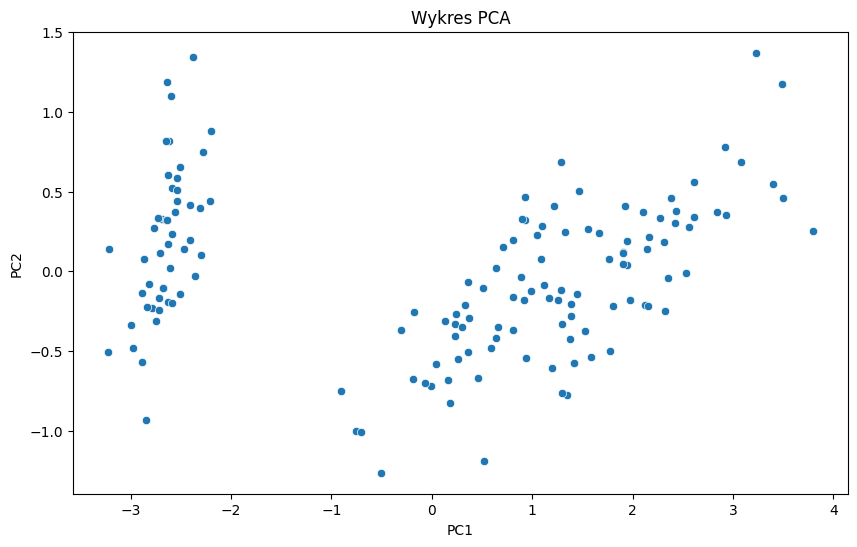

In [40]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, palette='Set1')
plt.title('Wykres PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Ten wykres jest wykreslaniem wartości udziału wariancji wyjaśnionej przez poszczególne składowe główne w Analizie Składowych Głównych (PCA). Oto, co prezentuje:

- Na osi poziomej znajdują się numeracje składowych głównych.
- Na osi pionowej znajduje się wartość udziału wariancji wyjaśnionej przez każdą składową główną.
- Każdy słupek na wykresie reprezentuje procentową wartość udziału wariancji wyjaśnionej przez daną składową główną.
- Wykres ten pomaga zobaczyć, jak dużo wariancji jest wyjaśnione przez poszczególne składowe główne. Jest to kluczowe w zrozumieniu efektywności PCA w redukcji wymiarowości danych.

W praktyce analiza takiego wykresu może pomóc w podjęciu decyzji dotyczących liczby składowych głównych do uwzględnienia w analizie, biorąc pod uwagę, ile wariancji można wyjaśnić za pomocą określonej liczby składowych.

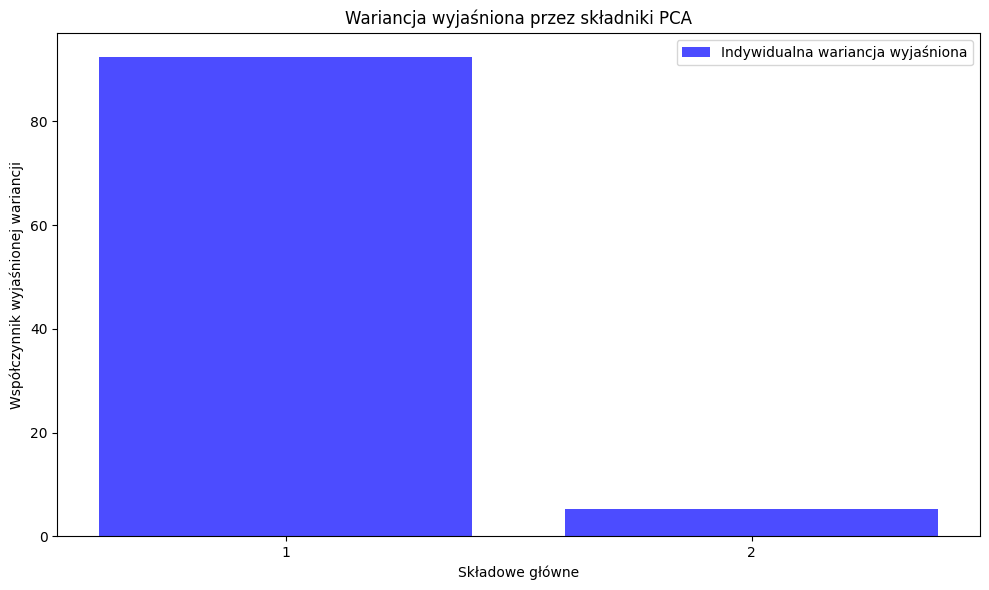

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Indywidualna wariancja wyjaśniona')
plt.ylabel('Współczynnik wyjaśnionej wariancji')
plt.xlabel('Składowe główne')
plt.title('Wariancja wyjaśniona przez składniki PCA')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='best')
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()
components = range(1, len(explained_variance) + 1)

In [42]:
print("Test Bartletta:")
print("Statystyka:", statistic)
print("P-wartość:", p_value)

print("\nWyniki PCA:")
print("Procent wariancji wyjaśnionej przez PC1:", explained_variance[0], "%")
print("Procent wariancji wyjaśnionej przez PC2:", explained_variance[1], "%")

print("\nPrzykładowe wyniki PCA dla długości kielicha:")
for i, sepal in enumerate(data["SepalLengthCm"][:5]):
    print(sepal, ":", principal_components[i])

Test Bartletta:
Statystyka: 3505.5704309340886
P-wartość: 0.0

Wyniki PCA:
Procent wariancji wyjaśnionej przez PC1: 92.46 %
Procent wariancji wyjaśnionej przez PC2: 5.3 %

Przykładowe wyniki PCA dla długości kielicha:
5.1 : [-2.68420713  0.32660731]
4.9 : [-2.71539062 -0.16955685]
4.7 : [-2.88981954 -0.13734561]
4.6 : [-2.7464372  -0.31112432]
5.0 : [-2.72859298  0.33392456]


#### Interpretacja:

Niska p-wartość (znacznie mniejsza od 0.05) w teście Barletta wskazuje, że możemy odrzucić hipotezę zerową, mówiącą, że macierz kowariancji jest równa macierzy jednostkowej, potwierdza to również statystyka która jest znacznie większa od 0. Oznacza to, że dane są odpowiednie do analizy PCA. Razem, dwie składowe (PC1 i PC2) wyjaśniają 97.76% całkowitej wariancji w zbiorze danych.
- Pierwsza składowa główna dominuje w danych, wyjaśniając większość wariancji. To wskazuje, że jest to główny czynnik różnicujący próbki w zbiorze danych Iris.
- Druga składowa, choć znacznie mniej znacząca, nadal wnosi dodatkową informację.
- Wyniki te sugerują, że większość informacji w zbiorze danych Iris można uchwycić za pomocą tych dwóch składowych.

## Klasteryzacja K-średnich

Popularna metoda analizy skupień (ang. cluster analysis) wykorzystywana w uczeniu maszynowym i statystyce do grupowania danych na podstawie ich cech. Metoda ta dzieli zbiór danych na K grup (klastrów), próbując zminimalizować wewnątrzgrupową wariancję.
Klasteryzacja k-średnich jest stosowana w celu grupowania podobnych obserwacji razem, co może pomóc w analizie danych, redukcji wymiarów, czy też ułatwieniu procesu uczenia maszynowego poprzez separację danych na bardziej jednorodne grupy.

Przygotowujemy dane

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
data = pd.read_csv('diamonds.csv', sep=',', header=0)
data = data.sample(frac=0.1)
numerical_features = data[['carat', 'depth', 'table', 'x', 'y', 'z']]

W zbiorze danych znajduje się 5394 diamentów z 10 cechami (karat, szlif, kolor, czystość, głębia, tafla, cena, x, y i z). Większość zmiennych ma charakter numeryczny, ale zmienne cut, color i clarity są zmiennymi jakościowymi.
Zaczynamy od przeskalowania naszych danych.

In [ ]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
X = numerical_features_scaled

#### Sprawdzenie inercji

Inercja mierzy, jak bardzo punkty w obrębie klastra są ze sobą podobne. Im niższa wartość inercji, tym lepiej klastry są zdefiniowane i bardziej jednorodne.

Kiedy zmniejsza się inercję, oznacza to, że klastry są bardziej skoncentrowane, co zazwyczaj jest pożądane. Jednak inercja sama w sobie nie dostarcza pełnej informacji o jakości klastrów, dlatego zazwyczaj stosuje się ją w kontekście analizy "łokcia" (elbow method).

Analiza łokcia pomaga w wyborze optymalnej liczby klastrów. W miarę zwiększania liczby klastrów, inercja maleje, ale po pewnym punkcie zyski są coraz mniejsze (klastry są bardziej skoncentrowane, ale również bardziej specyficzne dla pojedynczych punktów danych). Miejsce, gdzie maleje tempo zmiany inercji, jest nazywane "łokciem", a liczba klastrów zwykle wybierana jest na podstawie tego punktu.

In [ ]:
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


Tworzymy wykres inercji

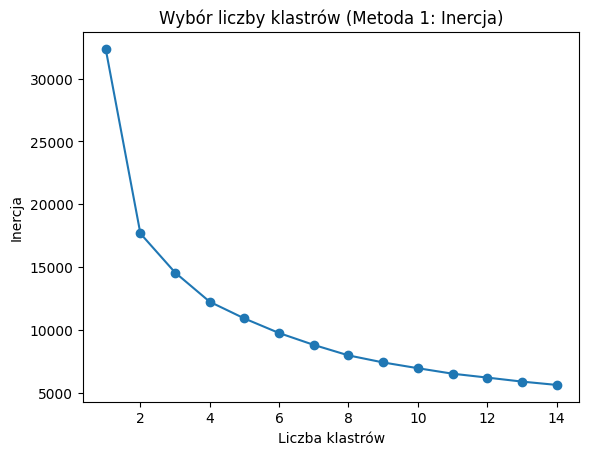

In [ ]:
plt.plot(range(1, 15), inertias, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inercja')
plt.title('Wybór liczby klastrów (Metoda 1: Inercja)')
plt.show()

Na podstawie wykresu wybieramy optymalną liczbę klastrów - 5. Tworzymy model klasteryzacji KMeans z optymalną liczbą klastrów i dopasowujemy model do danych.

In [ ]:
optimal_clusters_inertia = 5
kmeans_inertia = KMeans(n_clusters=optimal_clusters_inertia, random_state=42)
kmeans_inertia.fit(X)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

Dodajemy etykiety klastrów do danych

In [ ]:
data['cluster_inertia'] = kmeans_inertia.labels_

Metoda 2: Silhouette Score 
Miara, która ocenia, jak dobrze punkty danych są przyporządkowane do klastrów. Miara ta bazuje na dwóch podstawowych elementach: a i b.

a - Średnia odległość między punktem a innymi punktami w tym samym klastrze: To jest średnia odległość punktu od innych punktów w tym samym klastrze. Im mniejsza ta wartość, tym lepiej, ponieważ oznacza to, że punkty w klastrze są blisko siebie.

b - Średnia odległość między punktem a punktami w najbliższym klastrze, do którego punkt nie należy: To jest średnia odległość punktu od punktów w najbliższym klastrze, do którego punkt nie należy. Im większa ta wartość, tym lepiej, ponieważ oznacza to, że punkty są dobrze odseparowane od innych klastrów.

Interpretacja Silhouette Score:
- Silhouette Score mieszczący się w zakresie od -1 do 1.
- Wartości bliskie 1 wskazują na dobrze sklastrowane dane.
- Wartości bliskie -1 oznaczają, że punkty mogą być źle przyporządkowane.
- Wartości bliskie 0 sugerują, że punkt jest na granicy między dwoma klastrami.

In [ ]:
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

Wykres Silhouette Score

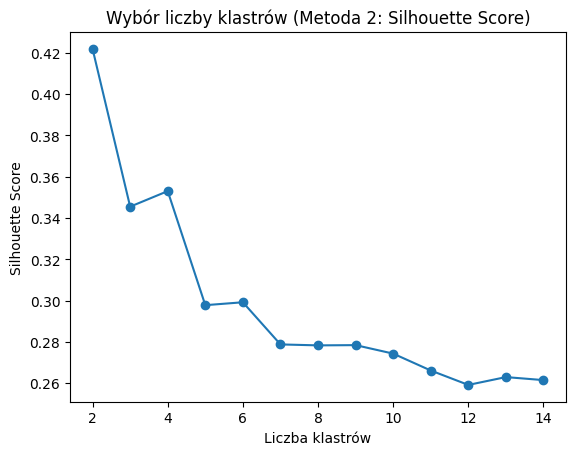

In [ ]:
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.title('Wybór liczby klastrów (Metoda 2: Silhouette Score)')
plt.show()

Wybieramy optymalną liczbę klastrów na podstawie analizy wykresu Silhouette Score

In [ ]:
optimal_clusters_silhouette = 4

Tworzymy model klasteryzacji KMeans z wybraną liczbą klastrów

In [ ]:
kmeans_silhouette = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
kmeans_silhouette.fit(X)
data['cluster_silhouette'] = kmeans_silhouette.labels_

Wyświetlamy wyniki

In [ ]:
print("Wyniki dla optymalnej liczby klastrów (Metoda 1: Inercja):")
print(data[['carat', 'depth', 'table', 'x', 'y', 'z', 'cluster_inertia']])

print("\nWyniki dla optymalnej liczby klastrów (Metoda 2: Silhouette Score):")
print(data[['carat', 'depth', 'table', 'x', 'y', 'z', 'cluster_silhouette']])

Wyniki dla optymalnej liczby klastrów (Metoda 1: Inercja):
       carat  depth  table     x     y     z  cluster_inertia
17340   1.21   62.1   57.0  6.79  6.83  4.23                2
41334   0.36   62.2   55.0  4.62  4.57  2.86                0
13778   1.52   60.4   59.0  7.44  7.39  4.48                1
33316   0.35   61.0   60.0  4.58  4.54  2.78                4
13853   1.05   62.6   59.0  6.50  6.43  4.05                2
...      ...    ...    ...   ...   ...   ...              ...
51461   0.70   62.1   57.0  5.68  5.60  3.50                2
14544   1.07   61.8   61.0  6.57  6.54  4.05                3
50878   0.70   62.1   60.0  5.71  5.65  3.53                4
18676   1.50   61.4   56.0  7.47  7.34  4.55                1
51482   0.74   60.4   56.0  5.86  5.83  3.53                2

[5394 rows x 7 columns]

Wyniki dla optymalnej liczby klastrów (Metoda 2: Silhouette Score):
       carat  depth  table     x     y     z  cluster_silhouette
17340   1.21   62.1   57.0  6.79  6.83

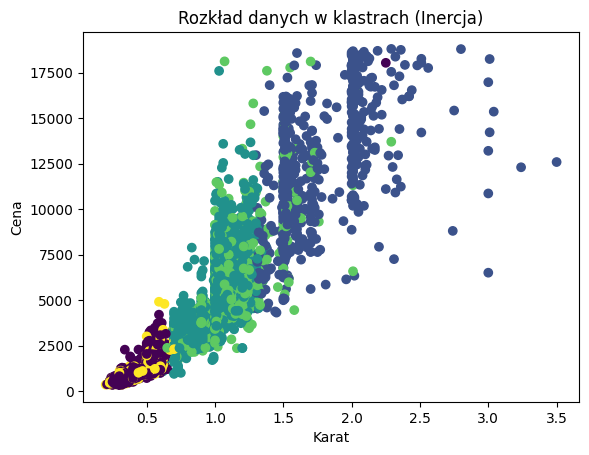

In [ ]:
plt.scatter(data['carat'], data['price'], c=data['cluster_inertia'], cmap='viridis')
plt.xlabel('Karat')
plt.ylabel('Cena')
plt.title('Rozkład danych w klastrach (Inercja)')
plt.show()

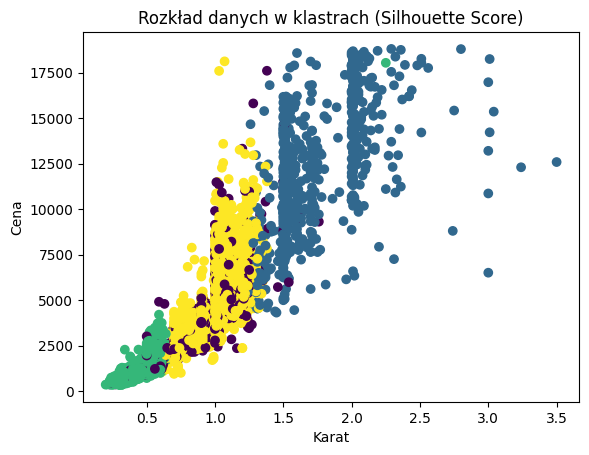

In [ ]:
plt.scatter(data['carat'], data['price'], c=data['cluster_silhouette'], cmap='viridis')
plt.xlabel('Karat')
plt.ylabel('Cena')
plt.title('Rozkład danych w klastrach (Silhouette Score)')
plt.show()


## Reguły asocjacyjne

### Apriori

Algorytm wykorzystywany do wykrywania związków między elementami w zbiorze danych. Działa na zasadzie "kombinacji przed selekcją"- generuje kandydatów do związków, a następnie sprawdza ich częstotliwość występowania w danych. Algorytm przeszukuje zbiór danych, tworząc kombinacje elementów i sprawdzając, które z nich występują często jednocześnie. Te, które spełniają określone kryterium częstotliwości, są uznawane za istotne związki i zwracane jako wynik działania algorytmu.

*Czyli np. jak ktoś kupił 2 filmy to może ktoś inny kupił również 2 te same filmy*

Algorytm Apriori stosuje dwa główne kryteria do określania istotności związków między elementami w zbiorze danych: **wsparcie (support)** i **ufność (confidence)**. Te metryki pozwalają zidentyfikować i ocenić siłę związków asocjacyjnych między różnymi przedmiotami w zbiorze danych. Oto szczegółowe opisy tych kryteriów:

**Wsparcie (Support):**
- Wsparcie jest miarą popularności zestawu przedmiotów i jest definiowane jako proporcja transakcji w danych, które zawierają ten zestaw przedmiotów.
- Wskaźnik wsparcia jest podstawą algorytmu Apriori, który polega na idei, że im częściej występuje kombinacja przedmiotów, tym bardziej jest istotna.
- Jest to procentowy udział wszystkich transakcji, które zawierają dany zestaw przedmiotów, w stosunku do całkowitej liczby transakcji.
- Na przykład, jeśli zestaw przedmiotów {chleb, mleko} pojawia się w 100 z 1000 transakcji, wsparcie dla tego zestawu wynosi 10%.

**Ufność (Confidence):**
- Ufność jest miarą niezawodności wygenerowanej reguły asocjacyjnej.
- Definiuje się ją jako stosunek liczby transakcji zawierających wszystkie przedmioty z reguły, do liczby transakcji zawierających tylko przedmioty z lewej strony reguły.
- Innymi słowy, mierzy ona, jak często przedmioty po prawej stronie reguły występują w transakcjach, które zawierają przedmioty po lewej stronie.
- Na przykład, jeśli mamy regułę {chleb} -> {mleko} z ufnością 70%, oznacza to, że 70% transakcji z chlebem zawiera również mleko.

**Lift:**

Lift to miara używana w analizie reguł asocjacyjnych, takich jak te generowane przez algorytm Apriori. Pomaga określić, jak bardzo reguła asocjacyjna jest "interesująca" lub "informatywna" w kontekście analizy danych. W skrócie, lift informuje nas o tym, czy wystąpienie jednego elementu jest związane z wystąpieniem drugiego elementu w danej regule asocjacyjnej i w jakim stopniu.

Oto kilka kluczowych pojęć związanych z miarą lift:

- Lift > 1: Oznacza, że wystąpienie jednego elementu (lub zestawu elementów) zwiększa prawdopodobieństwo wystąpienia drugiego elementu. Im wyższy jest lift, tym silniejszy jest związek między tymi elementami.

- Lift = 1: Oznacza, że wystąpienie jednego elementu nie ma wpływu na prawdopodobieństwo wystąpienia drugiego elementu. Reguła asocjacyjna jest neutralna.

- Lift < 1: Oznacza, że wystąpienie jednego elementu zmniejsza prawdopodobieństwo wystąpienia drugiego elementu. W takim przypadku elementy są negatywnie skorelowane.

Interpretacja: Im większy lift, tym silniejszy związek między elementami. Na przykład, jeśli lift = 2, to oznacza, że wystąpienie jednego elementu jest dwukrotnie bardziej prawdopodobne, jeśli wystąpił drugi element w tej samej transakcji, w porównaniu do wystąpienia tego pierwszego elementu w ogóle transakcji.

**Przydatność:** Lift jest przydatny do wyboru najważniejszych reguł asocjacyjnych. Im wyższy lift, tym bardziej wartościowa jest reguła, ponieważ sugeruje, że występowanie jednego elementu ma wpływ na wystąpienie innego elementu.

In [ ]:
with open("proj1.csv", "r") as f:
    csv_reader = csv.reader(f)
    transactions = list(csv_reader)

rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

lgorytm ten przeszukuje zbiór danych w celu znalezienia częstych zestawów elementów, które spełniają te kryteria. Funkcja "prepare_output" jest używana do przetwarzania wyników algorytmu Apriori i tworzenia czytelnej tabeli wynikowej. Wyniki zawierają informacje o zestawach elementów (Items), wsparciu (Support), ufności (Confidence) i lift (Lift).\
Wyniki są sortowane w kolejności malejącej na podstawie wartości "Lift", co oznacza, że zestawy elementów są uporządkowane od tych, które mają największy wpływ na siebie nawzajem.

In [ ]:
def prepare_output(results):
    Support, Confidence, Lift, Items, Antecedent, Consequent = [], [], [], [], [], []

    for RelationRecord in results:
        for ordered_stat in RelationRecord.ordered_statistics:
            Support.append(RelationRecord.support)
            Items.append(set(RelationRecord.items))
            Antecedent.append(set(ordered_stat.items_base))
            Consequent.append(set(ordered_stat.items_add))
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)

    df = pd.DataFrame({
        'Items': Items,
        'Antecedent': Antecedent,
        'Consequent': Consequent,
        'Support': Support,
        'Confidence': Confidence,
        'Lift': Lift
    })

    return df

Wyniki te pozwalają zrozumieć, które zestawy elementów są często występujące i mają silne związki wzajemne w analizowanych danych. Dla każdego zestawu elementów można ocenić, jakie są wsparcie, ufność i lift, co pomaga w identyfikacji istotnych związków między elementami w danych.

In [ ]:
results = prepare_output(rules)

sorted_results = results.sort_values("Lift", ascending=False)

print(sorted_results)

                                                 Items  \
548  {FELONY, STREET, MANHATTAN, COMPLETED, SEXUAL ...   
920  {FELONY, STREET, SEX CRIMES, MANHATTAN, COMPLE...   
925  {FELONY, STREET, SEX CRIMES, MANHATTAN, COMPLE...   
550  {FELONY, STREET, MANHATTAN, COMPLETED, SEXUAL ...   
922  {FELONY, STREET, SEX CRIMES, MANHATTAN, COMPLE...   
..                                                 ...   
500  {FELONY, BROOKLYN, RESIDENCE-HOUSE, SEX CRIMES...   
497  {FELONY, BROOKLYN, RESIDENCE-HOUSE, SEX CRIMES...   
676  {MISDEMEANOR, RESIDENCE-HOUSE, SEX CRIMES, COM...   
679  {MISDEMEANOR, RESIDENCE-HOUSE, SEX CRIMES, COM...   
239  {RESIDENCE-HOUSE, MISDEMEANOR, COMPLETED, STAT...   

                                          Antecedent  \
548                                 {FELONY, STREET}   
920                                 {FELONY, STREET}   
925                     {FELONY, STREET, SEX CRIMES}   
550                      {FELONY, STREET, COMPLETED}   
922                    